# The FACSPy dataset: Structure

This vignette is supposed to explain the structure of a FACSPy dataset.

FACSPy is built around the `AnnData` object. For further information on AnnData objects,
please refer to their official documentation.

This notebook covers a brief explanation of the AnnData slots and where essential information
is stored.

Later on, FACSPy-specific features will be introduced that enable the user to analyze specific
populations from within the same AnnData object.



## A quick overview:

1) The `.obs` slot contains all cell-specific metadata.  
2) The `.var` slot contains all panel-related information.  
3) The `.layers` slot contains different versions of the data.  
4) The `.obsm` slot contains the gating matrix as well as dimensionality reduction coordinates.  
5) The `.uns` slot contains unstructured metadata, user-supplied information and sample-wise analyses.  

In [1]:
import FACSPy as fp

First, we read in a dataset via the `fp.read_dataset()` function. This dataset has been pre-assembled
and saved to the hard drive.

As we can see, the dataset consists of 3103969 cells and 36 channels.

In [2]:
dataset = fp.read_dataset(input_dir = "../Tutorials/spectral_dataset/",
                          file_name = "raw_dataset")
dataset

AnnData object with n_obs × n_vars = 3103969 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

## The `.obs` slot - cell metadata

`.obs` stores the observation's characteristics, in this case the metadata. The metadata that 
were provided during dataset assembly are copied for each cell of the respective sample.

The `.obs` slot contains a `pandas.DataFrame` that can be modified using conventional pandas methods.

In [3]:
dataset.obs.head()

,sample_ID,file_name,group_fd,internal_id,organ,staining,diag_main,diag_fine,donor_id,material,batch
0-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
1-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
2-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
3-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
4-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1


## Indexing `.obs` - Selecting groups of cells

In order to select specific subsets of the data that can be described in terms of their metadata 
we can use indexing similar to indexing numpy arrays and pandas dataframes.

Here, we subset the dataset so that only cells from the sample with sample_ID 1 are kept.

In [4]:
sample_1_subset = dataset[dataset.obs["sample_ID"] == "1",:]
sample_1_subset

View of AnnData object with n_obs × n_vars = 183756 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

## The `.var` slot - the cytometry panel

`.var` stores the panel information. This information is concatenated from the .fcs file 
and the user supplied panel. Note that the index of the table contains the antigens and 
not the fluorochromes. That means that for all functions that perform visualization tasks, the antigen 
name is used.

The type of a channel can be either 'time', 'scatter', 'fluo' and 'technical' and is automatically determined upon dataset creation. Channels of type 'fluo' correspond to channels that are neither recognized as 'time', 'scatter' or 'technical'.

In [5]:
dataset.var.head(10)

,pns,png,pne,type,pnn,cofactors
Time,Time,1.0,"(0.0, 0.0)",time,Time,1.0
SSC-H,SSC-H,1.0,"(0.0, 0.0)",scatter,SSC-H,1.0
SSC-A,SSC-A,1.0,"(0.0, 0.0)",scatter,SSC-A,1.0
FSC-H,FSC-H,1.0,"(0.0, 0.0)",scatter,FSC-H,1.0
FSC-A,FSC-A,1.0,"(0.0, 0.0)",scatter,FSC-A,1.0
SSC-B-H,SSC-B-H,1.0,"(0.0, 0.0)",scatter,SSC-B-H,1.0
SSC-B-A,SSC-B-A,1.0,"(0.0, 0.0)",scatter,SSC-B-A,1.0
CD38,CD38,1.0,"(0.0, 0.0)",fluo,BUV395-A,1298.1292
NKG2C_(CD159c),NKG2C_(CD159c),1.0,"(0.0, 0.0)",fluo,BUV496-A,1132.2448
CD3,CD3,1.0,"(0.0, 0.0)",fluo,BUV563-A,5287.9663


The individual channels can be accessed by the .var_names attributes

In [6]:
dataset.var_names

Index(['Time', 'SSC-H', 'SSC-A', 'FSC-H', 'FSC-A', 'SSC-B-H', 'SSC-B-A',
       'CD38', 'NKG2C_(CD159c)', 'CD3', 'CD16', 'CD161', 'CD32', 'CD56',
       '41BB_(CD137)', 'CD4', 'CD64', 'KLRG1', 'CD45', 'HLA_DR', 'CD19',
       'NKp44', 'CD69', 'TIGIT', 'CD57', 'CD8', 'CD14', 'CD27',
       'NKG2A_(CD159a)', 'CTLA-4_(CD152)', 'TRAIL_(CD253)', 'PD-1_(CD279) ',
       'CD18', 'Zombie_NIR', 'CD66b', 'AF-A'],
      dtype='object')

## Indexing `.var` - Selecting specific channels

Similar to the `.obs` indexing, we use numpy/pandas indexing to subselect data corresponding to specific channels.

Here, we subset the dataset so that only the channels corresponding to CD3 and CD19 are kept.

In [7]:
channel_subset = dataset[:,dataset.var["pns"].isin(["CD3", "CD19"])]
channel_subset

View of AnnData object with n_obs × n_vars = 3103969 × 2
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [8]:
channel_subset.var

,pns,png,pne,type,pnn,cofactors
CD3,CD3,1.0,"(0.0, 0.0)",fluo,BUV563-A,5287.9663
CD19,CD19,1.0,"(0.0, 0.0)",fluo,BV650-A,617.30945


FACSPy offers convenience functions in order to subset specific channels.

Here, we only keep the channels of type 'fluo'.

Note that in order to perform analysis, you can decide whether to include scatter/time/technical channels in the analysis in the respective functions. It is therefore not strictly necessary to subset fluo channels in advance.

In [9]:
fluo_only = fp.subset_fluo_channels(dataset,
                                    copy = True)
fluo_only.var.head()

,pns,png,pne,type,pnn,cofactors
CD38,CD38,1.0,"(0.0, 0.0)",fluo,BUV395-A,1298.1292
NKG2C_(CD159c),NKG2C_(CD159c),1.0,"(0.0, 0.0)",fluo,BUV496-A,1132.2448
CD3,CD3,1.0,"(0.0, 0.0)",fluo,BUV563-A,5287.9663
CD16,CD16,1.0,"(0.0, 0.0)",fluo,BUV615-A,14275.482
CD161,CD161,1.0,"(0.0, 0.0)",fluo,BUV661-A,2890.5862


In order to remove a specific channel, you can use the `fp.remove_channel()` function
Here, we remove the channel corresponding to the antigen CD16.

In [10]:
without_CD16 = fp.remove_channel(dataset, "CD16",
                                 copy = True)
assert "CD16" not in without_CD16.var_names

## The `.obsm slot` - gating matrix

By default, the `.obsm` slot stores the gating information retrieved from a workspace or added by the user as a sparse matrix.

In [11]:
type(dataset.obsm["gating"])

scipy.sparse._csr.csr_matrix

This matrix is a boolean matrix where 'True' means that a cell is within the gate and False means the opposite.

The gate names are stored in `.uns['gating_cols']`. We assemble the matrix, the index and the gate-names into a 
pandas dataframe:

In [12]:
import pandas as pd
gating = pd.DataFrame(data = dataset.obsm["gating"].toarray(),
                      index = dataset.obs_names,
                      columns = dataset.uns["gating_cols"])
gating.head()

,root/all_cells,root/all_cells/FSC_singlets,root/all_cells/FSC_singlets/live,root/all_cells/FSC_singlets/live/CD45+,root/all_cells/FSC_singlets/live/CD45+/PBMC,"root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg","root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/NK","root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T","root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T/CD8+T"
0-0,True,True,True,True,True,True,False,True,False
1-0,True,True,True,True,True,True,False,False,False
2-0,True,True,True,True,True,True,False,True,False
3-0,True,True,True,False,False,False,False,False,False
4-0,True,True,True,True,True,True,False,True,True


The user is not supposed to access this matrix directly. Instead, we can use FACSPy functions to access specific gates.

Here, we subset only live cells.

Note that we are using the copy parameter to copy the live cells into the variable live_cells.

In [13]:
live_cells = fp.subset_gate(dataset,
                            "live",
                            copy = True)
live_cells

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

If instead of copying we want to discard all other cells that are not within the live cells, we set the parameter copy to False or leave it as default by not explicitly passing it.

For the rest of the vignette, we only keep live cells.

In [14]:
fp.subset_gate(dataset, "live")

## The `.obsm` slot - dimensionality reduction coordinates

The `.obsm` slot also stores coordinates for dimensionality reductions.

Here, we calculate a PCA on the transformed data for CD45+ cells.

In [15]:
fp.tl.pca(dataset,
          layer = "transformed",
          gate = "CD45+")

dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'settings', 'pca_CD45+_transformed'
    obsm: 'gating', 'X_pca_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'

Similar to the mfi dataframe, we store the dimensionality reduction, the gate and the data layer within the slot entry name.
That way, we can store dimensionality reductions, neighbors information etc. for multiple gates at the same time and easily access them.

The plotting utility will use the corresponding information to access the correct slots.

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


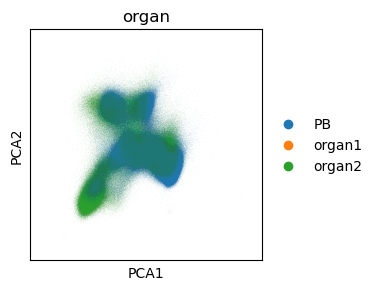

In [16]:
fp.pl.pca(dataset,
          layer = "transformed",
          gate = "CD45+",
          color = "organ")

## The `.layers` slot - data storage

The `.layers` slot contains different versions of the data. By default, we have compensated data that are created from the .fcs file and a compensation matrix.

Here, we also have transformed data that were created by `fp.dt.transform()`. Since we use both data formats for different analysis types, we keep them both readily available in the same dataset.

In [17]:
dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'settings', 'pca_CD45+_transformed', 'organ_colors'
    obsm: 'gating', 'X_pca_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'

We can access these layers by using anndata's `.to_df()` method. Here, we convert the layer 'compensated' to a pandas dataframe.

In [18]:
dataset.to_df(layer = "compensated").head()

,Time,SSC-H,SSC-A,FSC-H,FSC-A,SSC-B-H,SSC-B-A,CD38,NKG2C_(CD159c),CD3,...,CD14,CD27,NKG2A_(CD159a),CTLA-4_(CD152),TRAIL_(CD253),PD-1_(CD279),CD18,Zombie_NIR,CD66b,AF-A
0-0,0.0000,280669.0,2.964933e+05,1294084.0,1501242.750,239248.0,2.784677e+05,3733.869629,2428.832031,83645.859375,...,2196.446045,11616.447266,-6762.053223,228.966385,33.528599,94.960457,7313.366211,350.470825,275.108398,8161.391113
1-0,0.0034,408956.0,4.385952e+05,1095373.0,1253709.375,331308.0,3.864948e+05,-81.559128,-1160.806519,104297.421875,...,1770.571655,-821.060364,-8796.852539,-1698.822144,369.262634,488.935730,28683.802734,-980.601562,758.078125,9775.565430
2-0,0.0043,456595.0,4.995947e+05,1037646.0,1191190.000,346673.0,4.079460e+05,3523.129639,1337.915161,97211.875000,...,151.382462,3082.001221,1003.328857,67.463631,748.273804,3780.447021,40503.281250,-1788.460205,-21.585938,8605.550781
3-0,0.0055,1145342.0,1.912832e+06,1896447.0,3095241.500,1068368.0,1.890969e+06,-2893.820557,-66354.523438,117631.554688,...,66223.476562,-27051.164062,-201888.609375,-44016.957031,1557.418945,-10924.555664,127950.484375,12481.312500,7094.832031,88197.375000
4-0,0.0058,566604.0,6.517887e+05,1006409.0,1248624.875,414126.0,4.997060e+05,-10.057960,3012.665771,23707.751953,...,-1838.767578,5670.687500,4823.494141,3098.549561,717.823181,10720.612305,20161.494141,-860.871826,392.693848,3137.052734


## The `.uns` slot - unstructured metadata

The `.uns` slot contains all data that do not fit the original shape (n_cells x n_channels) of the dataset.

By default, a `Metadata` object, a `Panel` object, a `FlowJoWorkspace` object, the gate names and a dataset status hash are stored here.

In [19]:
print(dataset.uns["metadata"], end = "\n\n")
print(dataset.uns["panel"], end = "\n\n")
print(dataset.uns["cofactors"], end = "\n\n")
dataset

Metadata(36 entries with factors ['group_fd', 'internal_id', 'organ', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'])

Panel(28 channels, loaded as provided file)

CofactorTable(28 channels, loaded as provided dataframe)



AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'settings', 'pca_CD45+_transformed', 'organ_colors'
    obsm: 'gating', 'X_pca_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'

After calculating samplewise analyses (for example MFI/FOPs), the corresponding dataframes are also stored here.

Here, we calculate the MFI on the compensated data and in turn create a `.uns` entry with the name 'mfi_sample_ID_compensated'. The entry is a pandas dataframe.

In [20]:
fp.tl.mfi(dataset,
          layer = "compensated")

dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'settings', 'pca_CD45+_transformed', 'organ_colors', 'mfi_sample_ID_compensated'
    obsm: 'gating', 'X_pca_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'

When we inspect the dataframe, we see that for every gate, the MFI values have been calculated per channel.

In [21]:
dataset.uns["mfi_sample_ID_compensated"].head()

,,Time,SSC-H,SSC-A,FSC-H,FSC-A,SSC-B-H,SSC-B-A,CD38,NKG2C_(CD159c),CD3,...,CD14,CD27,NKG2A_(CD159a),CTLA-4_(CD152),TRAIL_(CD253),PD-1_(CD279),CD18,Zombie_NIR,CD66b,AF-A
sample_ID,gate,,,,,,,,,,,,,,,,,,,,,
1,root/all_cells,92.338799,426979.0,483348.156250,1280046.0,1.525810e+06,343562.0,416366.468750,3096.480225,421.562561,4260.855957,...,326.190948,2415.716309,-2186.655518,113.783081,567.933838,476.055206,21647.068359,64.106445,382.719727,8249.457031
2,root/all_cells,91.307152,461467.5,528586.281250,1314374.5,1.597389e+06,370216.0,454101.234375,3649.359985,752.088287,27555.433594,...,49.189646,4699.732422,-2126.341431,354.737915,765.017456,763.312592,19111.833008,380.439178,394.168945,7477.313477
3,root/all_cells,100.621799,458393.0,523310.906250,1203675.5,1.438810e+06,374794.0,456158.156250,2338.043701,541.534790,28436.040039,...,1491.264160,1293.785889,-2469.103516,-16.103633,844.625580,579.380524,17958.804688,694.674988,371.653076,6341.876709
4,root/all_cells,98.125847,412581.0,460528.484375,1208110.0,1.420063e+06,336580.0,401097.625000,3147.915283,1111.765991,43195.044922,...,1263.234619,4732.218994,-2937.132690,5.521069,671.986633,344.843430,11126.077637,737.335571,271.416504,6536.433105
5,root/all_cells,90.351402,442781.0,505627.750000,1265257.0,1.513078e+06,356986.0,436810.468750,2581.451660,1372.416504,4461.762695,...,5.471334,2372.531494,-1844.797852,191.291962,702.836304,584.618591,16370.416016,529.221924,345.144775,7698.866211


Similarly, if we calculate the fop using the same settings we create an entry called 'fop_sample_ID_compensated'

In [22]:
fp.tl.fop(dataset,
          layer = "compensated")
dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'settings', 'pca_CD45+_transformed', 'organ_colors', 'mfi_sample_ID_compensated', 'fop_sample_ID_compensated'
    obsm: 'gating', 'X_pca_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'

We also store analysis settings that were used for the respective function parameters in the `.uns['settings']` slot.

In [23]:
dataset.uns["settings"]

{'_pca_CD45+_transformed': {'gate': 'CD45+',
  'layer': 'transformed',
  'use_only_fluo': True,
  'exclude': [],
  'scaling': None},
 '_mfi_sample_ID_compensated': {'groupby': 'sample_ID',
  'method': 'median',
  'use_only_fluo': False,
  'layer': 'compensated'},
 '_fop_sample_ID_compensated': {'groupby': 'sample_ID',
  'cutoff': array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
         1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.2981292e+03,
         1.1322448e+03, 5.2879663e+03, 1.4275482e+04, 2.8905862e+03,
         5.5698975e+03, 2.7737961e+03, 2.1693916e+03, 4.2989844e+03,
         2.0747034e+03, 2.4437014e+03, 5.0000000e+03, 7.1690107e+03,
         6.1730945e+02, 1.3852777e+03, 1.4649585e+03, 4.0099905e+03,
         1.3888629e+03, 4.0046506e+03, 4.8489380e+03, 4.0826614e+02,
         7.7138184e+02, 1.3791636e+03, 2.5787056e+03, 1.2436598e+03,
         6.2204258e+03, 4.2631496e+04, 8.8387695e+03, 1.0000000e+00],
        dtype=float32),
  'use_only_fluo': False